In [1]:
!pip install pyarrow
!pip install fastparquet
!pip install nltk
!pip install textblob
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 6.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
import nltk
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_parquet(r"/content/drive/My Drive/Github Documents/Twitter NLP/Twitter_train.parquet")
df.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [ ]:
df.shape

(416809, 2)

In [6]:
#convert everything to lowercase
df["text"] = df["text"].str.lower()
df.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [7]:
#remove punctuation
df["text"] = df["text"].str.replace('[^\w\s]', '', regex=True)

df.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [8]:
#remove numbers
df["text"] = df["text"].str.replace('\d', '',regex=True)
df.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [9]:
#Bir kere indirmen yeterli
nltk.download('stopwords')

sw = stopwords.words('english')
new_var = df["text"]
new_var = df["text"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
#Nadir kelimeleri kaldırma
# Convert non-string values to strings and handle null values
df["text"] = df["text"].fillna('').astype(str)

temp_df = pd.Series(' '.join(df["text"]).split()).value_counts()

drops = temp_df[temp_df <= 1]

df["text"] = df["text"].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [11]:
# Convert non-string values to strings and handle null values
df["text"] = df["text"].fillna('').astype(str)
df.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [12]:
# Now proceed with your code
temp_df = pd.Series(' '.join(df["text"]).split()).value_counts()

drops = temp_df[temp_df <= 1]

In [13]:
nltk.download('wordnet')

#Lemmatization
df["text"] = df["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#Bir kere indirmen yeterli
nltk.download('vader_lexicon')

#Yorumların pozitif mi negatif mi olduğunu belirler
sia = SentimentIntensityAnalyzer()
df["polarity_score"] = df["text"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentiment_label"] = df["text"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > -0.3 else "neg")
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df.head()

,text,label,polarity_score,sentiment_label
0,i feel awful about it too because it s my job ...,0,0.0516,1
1,im alone i feel awful,0,-0.6124,0
2,ive probably mentioned this before but i reall...,1,0.6752,1
3,i wa feeling a little low few day back,0,-0.0790,1
4,i beleive that i am much more sensitive to oth...,2,0.6115,1


In [ ]:
df.value_counts("sentiment_label")

# Wordcloud

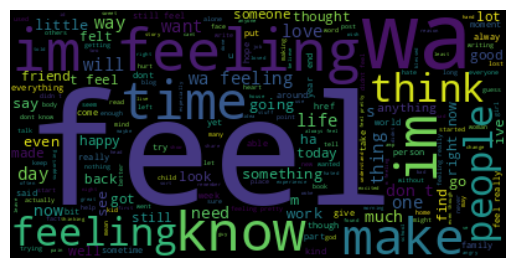

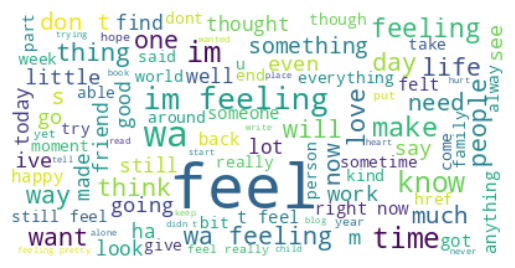

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(i for i in df.text)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file(r"/content/drive/My Drive/Github Documents/Twitter NLP/wordcloud.png")